# Simple implementation of a Random Forest for classification in C ++
## Raúl Mar
## A00512318

#### What is a Random Forest?
Random Forest is an ensemble algorithm for supervised classification and regression. The general method for Random Forests was first proposed by Tim Kam Ho in 1995, an extension of the algorithm was made later by Leo Breiman in 2001. Essentially, they are a modification of bagging that builds a large collection of of de-correlated trees, and then averages them. The main idea is to have a combination of weak tree predictors such that the features selected to split is chosen independently and with the same distribution for each of the trees in the forest in order to create a strong classifier. 


![Random Forest Image](https://cdn-images-1.medium.com/max/1600/0*tG-IWcxL1jg7RkT0.png)


##### Algorithm

1. For 1 to B where B is the number of trees to build in the forest
  * Draw a bootstrap sample z of size n from the Data set.
  * Grow each tree by:
    * Selecting m features at random from the M features in the sample z
    * Pick the best split point among the m
    * Split the node into two children nodes
    * Stop if we reached a pure node or if we reached the maximum depth for the tree
2. Output the ensemble of the trees

The number of trees to create depends on the dataset and the user criteria. The m features to select is normally sqrt(lenght of total features in sample). The maximun depth for the tree should be at least [2](https://web.stanford.edu/~hastie/Papers/ESLII.pdf). 

The way in which we split the nodes can be done by calculating the gini index or the information gain. For this project I chose to split by calculating the gini index mainly because for the Laboratory 3 about Decision Trees, we implemented the information gain, so I wanted to try the other method to understand it better.

##### Gini Index
For computing the gini index, what we do is:

1. For all the splitting features m we chose the one that gives the maximum gini coeficient by:

2. We calculate for each of the attributes in feature m we pick the attribute that gives the highest gini coeficient   using this formula:
    
\begin{align}
\ Gini = 1- \sum\limits_{i=1}^K (P_k)^2  \\
Where \ K \ is \ the \ set \ of \ all \ the \ attributes \ for \ a \ feature \ m.
\end{align}

3. We split by the feature m that gave the highest gini coeficient  



#### What I did
The main motivation for implementing from scratch a random forests in C++ was that I believe that by doing everything by myself without the use of any library, I can obtain a deeper understanding of how the algorithm works. I want to clarify that the implementation that I did does not cover the full functionalities of a Random Forest. My implementation is capable of:

* Building n trees in parallel each with sqrt(m) features where M is the total number of features from the dataset.
* Grow each tree by using the gini index as the splitting criterion
* Stop splitting if we reach a pure node, or if the have reached the max_depth provided by the user.
* Classify a query by querying each tree in parallel.

For it to be a full implementation of a Random Forest I would need to support:
* Feature importance
* OOB error
* Regression
* Support datasets with missing values

##### Dataset

The dataset that I used in order to train/test and compare against scikit-learn implementation of Random Forests was [this](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data). The data set consists on 2000 records which describe the specifications of a mobile phone and classifies it in a price range: 

* 0(low cost)
* 1(medium cost)
* 2(high cost)
* 3(very high cost)

The dataset was divided into 70%(1400 samples) for training and 30%(600 samples) for testing. The reason that I chose to split it in that way was because that is what I [found](https://www.kaggle.com/general/9456) as the "normal" thing to to for random forests classifiers.

#### Results

In order to have some way of comparing my implementation, I opted for comparing against scikit-learn [implementation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) of Random Forests Classifier, and the reason of that is because I have already used it in the past with different algorithms for different projects and I found it really easy to use and very well documented. Therefore, my aim is to create a similar implementation that works a lot like the one from scikit-learn.

The tests that I performed where to measure building time, predicting time and score. I will show some graphics where we can see how miserable I did.

In [1]:
import numpy as np

"""
This first batch of tests consist of building 10 forests. Each with first 1 
tree, then 2, 3,......10 each with max depth of 2. The main intention of this 
was to see how accurate can a random forest be with small and short trees.
"""

# results for building forest with trees from 1 10 with max-depth = 2
scikit_build_time = np.array([(1, 0.11239409446716309), (2, 0.11244893074035645), (3, 0.1103048324584961), (4, 0.11242198944091797), (5, 0.11184287071228027), (6, 0.11103200912475586), (7, 0.11551380157470703), (8, 0.11576175689697266), (9, 0.11564993858337402), (10, 0.1198725700378418)])
my_build_time = np.array([(1, 1.567), (2, 1.447), (3, 1.539), (4, 2.149), (5, 2.911), (6, 3.708), (7, 8.441), (8, 7.846), (9, 13.001), (10, 10.557)])

# results for predicting forest with the same trees 
sckikit_predict_time = np.array([(1, 0.2633333333333333), (2, 0.6066666666666667), (3, 0.495), (4, 0.7766666666666666), (5, 0.5016666666666667), (6, 0.6366666666666667), (7, 0.5516666666666666), (8, 0.5116666666666667), (9, 0.545), (10, 0.77)])
my_predict_time = np.array([(1, 0), (2, 0.069), (3, 0.072), (4, 0.074), (5, 0.072), (6, 0.083), (7, 0.073), (8, 0.076), (9, 0.084), (10, 0.074)])

# score from previous trees
sckikit_score = np.array([(1, 0.49),(2, 0.47),(3, 0.5116666666666667),(4, 0.545),(5, 0.52),(6, 0.5683333333333334),(7, 0.7066666666666667),(8, 0.58),(9, 0.5266666666666666),(10, 0.695)])
my_score = np.array([(1, 0.256667), (2, 0.815), (3, 0.805),(4, 0.813333), (5, 0.816667), (6, 0.728333), (7, 0.823333), (8, 0.253333), (9, 0.821667), (10, 0.263333)])

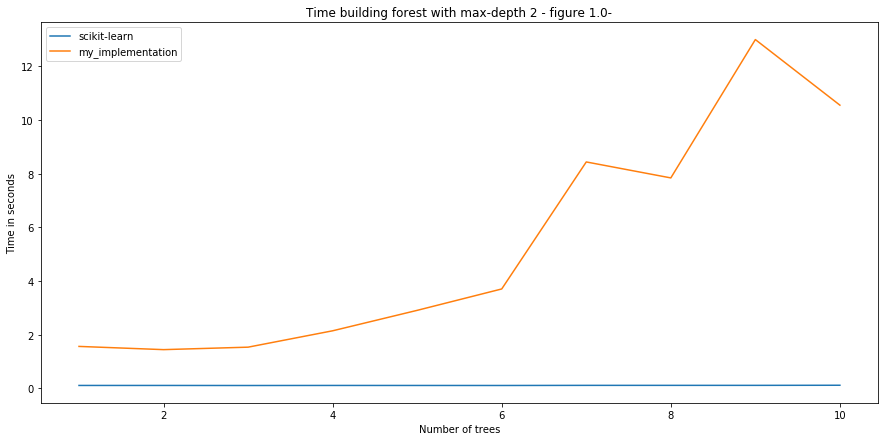

In [9]:
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['figure.figsize'] = [15, 7]
plt.ylabel('Time in seconds')
plt.xlabel('Number of trees')
plt.title('Time building forest with max-depth 2 - figure 1.0-')
plt.plot(*zip(*scikit_build_time), label="scikit-learn")
plt.plot(*zip(*my_build_time), label="my_implementation")
plt.legend()

In the graph above, we can see how slow my implementation is when building each forest. The main reason of this is because of the way in which I am computing the split criterion. The way in which I'm doing it takes O(n**2) time complexity and space complexity O(n). I later found a post on [post](https://stats.stackexchange.com/questions/105487/the-efficiency-of-decision-tree) on stackexchange that talks about how to improve the performance of a Random Forest. In that post they explain a O(n) time complexity algorithm for calculating the splitting criterion. Due to the limited amount of time I had and all the bugs that I had while coding this project, I was unable to implement the faster way of building the trees.

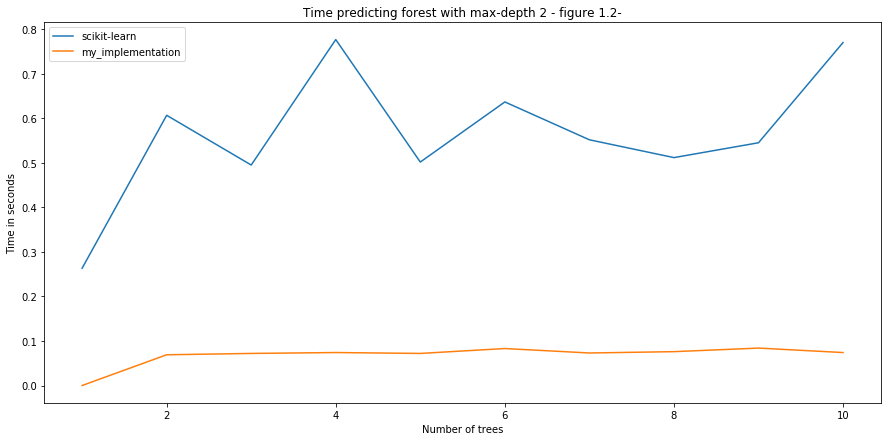

In [10]:
plt.ylabel('Time in seconds')
plt.xlabel('Number of trees')
plt.title('Time predicting forest with max-depth 2 - figure 1.2-')
plt.plot(*zip(*sckikit_predict_time), label="scikit-learn")
plt.plot(*zip(*my_predict_time), label="my_implementation")
plt.legend()

In the figure above, we can see that for predicting, my implementation is faster, this is expected since Python is [written in C](https://www.quora.com/What-is-Python-written-in), which leads to another conclusion that maybe not only the way in which I'm calculating the splitting criterion is slow, I think I have some very bad problems with memory management. Unfortunately I was unable to prove this though.

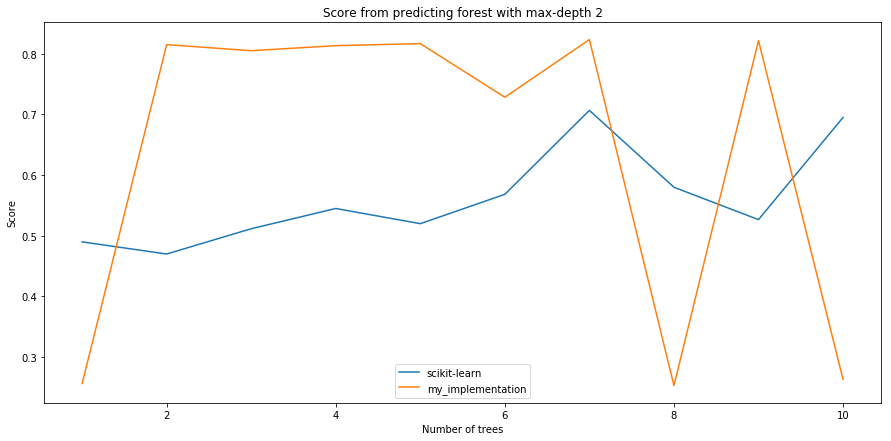

In [11]:
plt.ylabel('Score')
plt.xlabel('Number of trees')
plt.title('Score from predicting forest with max-depth 2')
plt.plot(*zip(*sckikit_score), label="scikit-learn")
plt.plot(*zip(*my_score), label="my_implementation")
plt.legend()

For predicting, sometimes my implementation is better and sometimes worse.

In [12]:
"""
For the next tests,we now try with bigger forests, 
we start with 25 trees and keep building forests each time by 
incrementing the number of trees per forest by 25 until we reach 500 
trees in a forest. Each forest was max_depth 10.
"""

scikit_build_time_2 = np.array([(25, 0.14169907569885254), (50, 0.16149616241455078), (75, 0.2878692150115967), (100, 0.32459115982055664), (125, 0.3455038070678711), (150, 0.47414708137512207), (175, 0.50897216796875), (200, 0.6480038166046143), (225, 0.7711877822875977), (250, 0.7430751323699951), (275, 0.9384067058563232), (300, 0.8537948131561279), (325, 0.9658739566802979), (350, 1.2162902355194092), (375, 1.3096709251403809), (400, 1.2872178554534912), (425, 1.2292540073394775), (450, 1.311039924621582), (475, 1.35695219039917), (500, 1.4725921154022217)])
my_build_time_2 = np.array([(25, 15.01), (50, 29.608), (75, 42.202), (100, 55.156), (125, 74.757), (150, 94.441), (175, 106.09), (200, 120.511), (225, 132.117), (250, 158.548), (275, 172.363), (300, 186.447), (325, 189.227), (350, 209.752), (375, 199.446), (400, 216.24), (425, 260.016), (450, 264.683), (475, 278.791), (500, 299.935)])

# results for predicting forest with the same trees 
sckikit_predict_time_2 = np.array([(25, 0.10662674903869629), (50, 0.10692405700683594), (75, 0.10454201698303223), (100, 0.10660600662231445), (125, 0.10626888275146484), (150, 0.1060628890991211), (175, 0.10494303703308105), (200, 0.1116788387298584), (225, 0.10396790504455566), (250, 0.10534286499023438), (275, 0.10752487182617188), (300, 0.21181225776672363), (325, 0.21249985694885254), (350, 0.20537304878234863), (375, 0.20955109596252441), (400, 0.2091829776763916), (425, 0.20935487747192383), (450, 0.20930695533752441), (475, 0.20959877967834473), (500, 0.20958900451660156)])
my_predict_time_2 = np.array([(25, 0.08), (50, 0.086), (75, 0.095), (100, 0.092), (125, 0.101), (150, 0.094), (175, 0.109), (200, 0.112), (225, 0.116), (250, 0.157), (275, 0.14), (300, 0.137), (325, 0.132), (350, 0.141), (375, 0.148), (400, 0.148), (425, 0.254), (450, 0.156), (475, 0.199), (500, 0.192)])

# score from previous trees
sckikit_score_2 = np.array([(25, 0.835), (50, 0.8666666666666667), (75, 0.8783333333333333), (100, 0.8716666666666667), (125, 0.88), (150, 0.865), (175, 0.8666666666666667), (200, 0.8683333333333333), (225, 0.885), (250, 0.87), (275, 0.88), (300, 0.8783333333333333), (325, 0.88), (350, 0.8733333333333333), (375, 0.885), (400, 0.88), (425, 0.87), (450, 0.8783333333333333), (475, 0.8766666666666667), (500, 0.8766666666666667)])
my_score_2 = np.array([(25, 0.805), (50, 0.821667), (50, 0.825), (100, 0.743333), (125, 0.825), (150, 0.661667), (175, 0.816667), (200, 0.731667), (225, 0.816667), (250, 0.815), (275, 0.8), (300, 0.826667), (325, 0.745), (350, 0.568333), (375, 0.808333), (400, 0.816667), (425, 0.83), (450, 0.82), (475, 0.743333), (500, 0.72)])

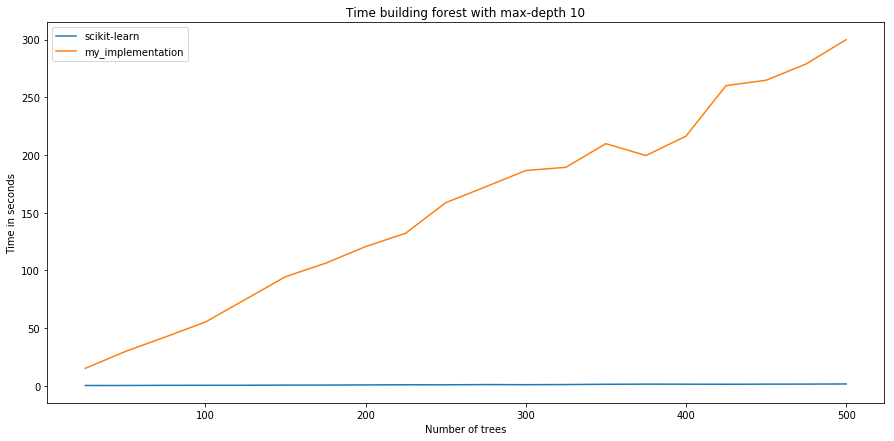

In [13]:
plt.ylabel('Time in seconds')
plt.xlabel('Number of trees')
plt.title('Time building forest with max-depth 10')
plt.plot(*zip(*scikit_build_time_2), label="scikit-learn")
plt.plot(*zip(*my_build_time_2), label="my_implementation")
plt.legend()

Now, with bigger forests we can see how almost exponentially slower is my implementation. Scikit-learn looks like it always takes the same time. 

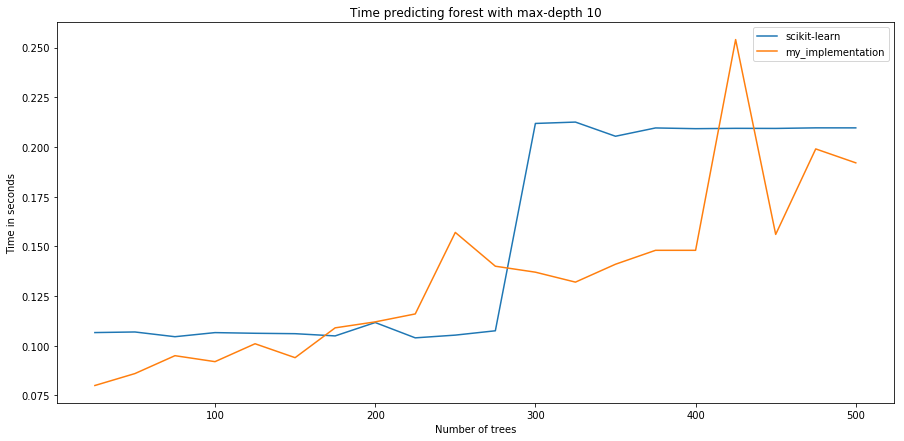

In [14]:
plt.ylabel('Time in seconds')
plt.xlabel('Number of trees')
plt.title('Time predicting forest with max-depth 10')
plt.plot(*zip(*sckikit_predict_time_2), label="scikit-learn")
plt.plot(*zip(*my_predict_time_2), label="my_implementation")
plt.legend()

For predicting big forests, my implementation seems to outperform the other one when the size of the forest reaches 200.

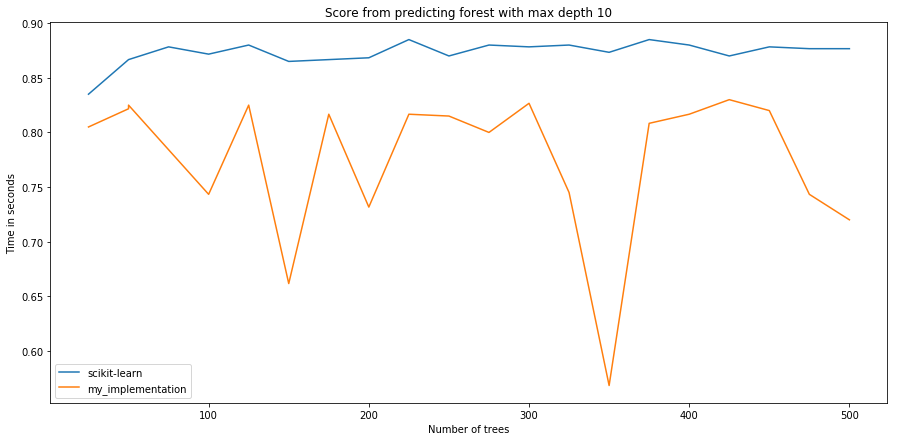

In [15]:
plt.ylabel('Time in seconds')
plt.xlabel('Number of trees')
plt.title('Score from predicting forest with max depth 10')
plt.plot(*zip(*sckikit_score_2), label="scikit-learn")
plt.plot(*zip(*my_score_2), label="my_implementation")
plt.legend()

For predicting, my implementation is doing terrible compared to the one from scikit-learn. Also, it is not stable, it goes up and down by a lot while the other one keeps within the same range of score.

#### Conclusion

I am dissapointed on how bad I did against scikit-learn implementation. I naively though that I could outperform it or at least have similar benchmarks. It is true that the one form scikit-learn is optimized and has been refactorized by a lot of developers and optimized to work fast. During the summer I still want to keep working on this project and try to at least take the times closer to scikit-learn's Random Forest Classifier, as well as:  

* As I already mentioned, change the way in how the splitting attribute is chosen, right now the complexity for that is O(n**2), this is why it is so slow. There is a [way](https://stats.stackexchange.com/questions/105487/the-efficiency-of-decision-tree) in which we can make it O(n), which will reduce the computing time for the splitting criterion reduce a lot.


* Implement the functionality of telling which features are the most important. This is a key property of Random Forests.


* Use new C++11 smart pointers instead of old-pointers, code will look cleaner and memory management will be optimized, as well as improve performance.


* Add functionality to support missing values form the dataset.


* Create exceptions when calling the classes so that it can work like the implementation from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict)

* Document the whole project better so in the future people can actually use it.


#### References

* https://stats.stackexchange.com/questions/105487/the-efficiency-of-decision-tree
* https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L518
* https://www.stat.berkeley.edu/users/breiman/randomforest2001.pdf
* https://web.stanford.edu/~hastie/Papers/ESLII.pdf
* https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/
* http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf
* http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics
* https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm
* https://cs.brown.edu/courses/cs123/docs/helpsessions/intermediate.pdf
* https://github.com/scikit-learn/scikit-learn/issues/1435